In [22]:
import matplotlib.pyplot as plt
import pandas as pd

## Pressure in mH20

In [23]:
Rjupnasalir_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-RS-ÞS212.xlsx')
Rjupnasalir_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Rjupnasalir_pressure['start_time'] = pd.to_datetime(Rjupnasalir_pressure['start_time'], errors='coerce')
Rjupnasalir_pressure.set_index('start_time',inplace=True)
Rjupnasalir_pressure = Rjupnasalir_pressure.sort_index(ascending=True)

Rjupnasalir_pressure_2024 = Rjupnasalir_pressure.loc['2024']
Rjupnasalir_pressure_2024 = Rjupnasalir_pressure_2024.copy()
Rjupnasalir_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Rjupnasalir_pressure_2024["mH20"] = Rjupnasalir_pressure_2024['mH20']* 10.197
Rjupnasalir_pressure_2024.head()

# Þetta er rétt 

,mH20
start_time,
2024-01-01 01:00:00,79.53660
2024-01-01 02:00:00,79.53660
2024-01-01 03:00:00,79.53660
2024-01-01 04:00:00,79.53660
2024-01-01 05:00:00,79.63857


## Flow in lps

In [24]:
Rjupnasalir_flow = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-RS-RS212.xlsx')
Rjupnasalir_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Rjupnasalir_flow['start_time'] = pd.to_datetime(Rjupnasalir_flow['start_time'], errors='coerce')
Rjupnasalir_flow.set_index('start_time',inplace=True)
Rjupnasalir_flow = Rjupnasalir_flow.sort_index(ascending=True)
Rjupnasalir_flow_2024 = Rjupnasalir_flow.loc['2024']
Rjupnasalir_flow_2024 = Rjupnasalir_flow_2024.copy()    
Rjupnasalir_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Rjupnasalir_flow_2024['Flæði [l/s]'] = Rjupnasalir_flow_2024['Flæði [l/s]']
Rjupnasalir_flow_2024.head()

,Flæði [l/s]
start_time,
2024-01-01 01:00:00,71.63
2024-01-01 02:00:00,72.20
2024-01-01 03:00:00,70.94
2024-01-01 04:00:00,69.50
2024-01-01 05:00:00,67.71


## Energy consumption in pump

In [25]:
df_pumps = pd.read_csv('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [26]:
Rjupnasalir_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-RS-DÆ222-PS']
Rjupnasalir_dæla_2024 = Rjupnasalir_dæla.loc['2024']
Rjupnasalir_dæla_2024 = Rjupnasalir_dæla_2024.copy()
Rjupnasalir_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Rjupnasalir_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
# erum með tvær eins dælur 
Rjupnasalir_dæla_2024['kW'] = Rjupnasalir_dæla_2024['kW'] * 2
Rjupnasalir_dæla_2024.head()


,kW
start_time,
2024-01-01 00:00:00,58.098275
2024-01-01 01:00:00,57.458256
2024-01-01 02:00:00,57.680747
2024-01-01 03:00:00,57.015135
2024-01-01 04:00:00,56.171442


## Theoretical power

In [27]:
df_calc_eff = pd.concat([Rjupnasalir_pressure_2024,Rjupnasalir_flow_2024,Rjupnasalir_dæla_2024],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['mH20'])*9.81/1000
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,
2024-01-01 00:00:00,NaN,NaN,58.098275,NaN
2024-01-01 01:00:00,79.5366,71.63,57.458256,55.889597
2024-01-01 02:00:00,79.5366,72.20,57.680747,56.334342
2024-01-01 03:00:00,79.5366,70.94,57.015135,55.351222
2024-01-01 04:00:00,79.5366,69.50,56.171442,54.227656


## Pump Efficiency

In [28]:
df_calc_eff['Efficiency'] = df_calc_eff['Theoretical power']/df_calc_eff['kW']
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,
2024-01-01 00:00:00,NaN,NaN,58.098275,NaN,NaN
2024-01-01 01:00:00,79.5366,71.63,57.458256,55.889597,0.972699
2024-01-01 02:00:00,79.5366,72.20,57.680747,56.334342,0.976658
2024-01-01 03:00:00,79.5366,70.94,57.015135,55.351222,0.970816
2024-01-01 04:00:00,79.5366,69.50,56.171442,54.227656,0.965395


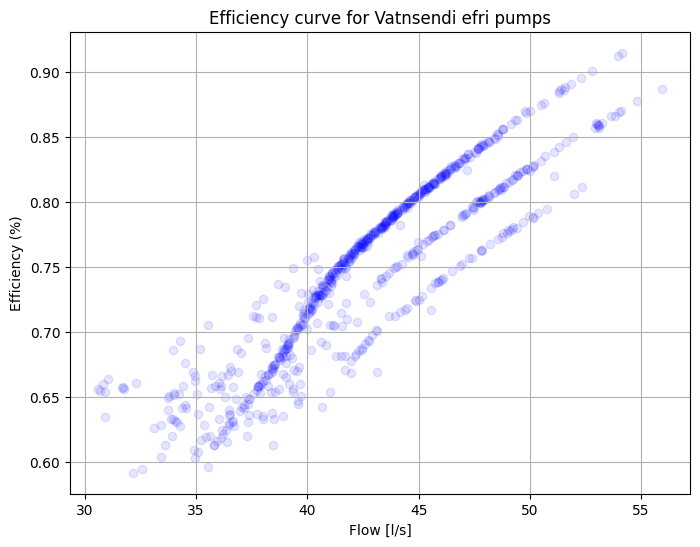

In [29]:


# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Flæði [l/s]', 'Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1.2]  # Remove rows where Efficiency is 0
df_clean_month = df_clean.loc['2024-05']


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean_month['Flæði [l/s]'], df_clean_month['Efficiency'], marker='o', color='b',alpha = 0.1)

# Adding titles and labels
plt.title('Efficiency curve for Vatnsendi efri pumps')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()